In [3]:
from Sims import Simulation as sim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Estado Inicial Encendido

In [4]:
file = f'.tests/test_double_time_distribution_on'

toy = sim(
            TMG=20, 
            cells=50, 
            file=file, 
            state='on'
            )
            
toy.get_time_distribution(mode='double')

100%|██████████| 50/50 [00:49<00:00,  1.01it/s]


In [5]:
df_on = pd.read_csv(f'{file}.csv', delimiter=',')
df_on

,Cell,On_Time,Off_Time,Promoter_State
0,1,498.4727,0.0000,off
1,1,498.4727,574.7892,on
2,2,737.3732,0.0000,off
3,2,737.3732,843.3748,on
4,3,54.0890,0.0000,off
...,...,...,...,...
95,48,616.5200,4559.2525,on
96,49,2088.2538,0.0000,off
97,49,2088.2538,2237.4438,on
98,50,425.3610,0.0000,off


### Células encendidas que se apagan

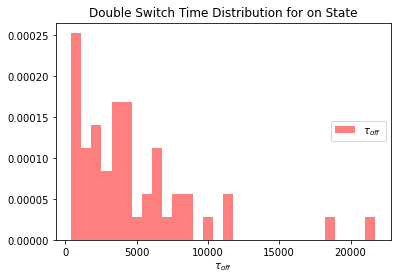

In [6]:
plt.hist(df_on['Off_Time'].unique()[1::], bins=30, density=True, color='red', alpha=0.5, label=r'$\tau_{off}$');
plt.legend(loc=5);
plt.xlabel(r'$\tau_{off}$');
plt.title(f'Double Switch Time Distribution for on State');


### Células que una vez se apagan, se encienden

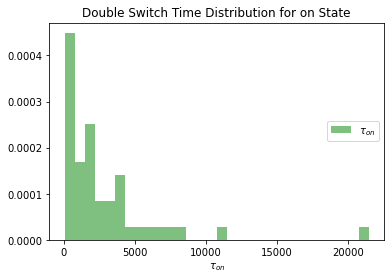

In [7]:
plt.hist(df_on['On_Time'].unique(), bins=30, density=True, color='green', alpha=0.5, label=r'$\tau_{on}$');
plt.legend(loc=5);
plt.xlabel(r'$\tau_{on}$');
plt.title(f'Double Switch Time Distribution for on State');

## Estado Inicial Apagado

In [8]:
file = f'.tests/test_double_time_distribution_off'

toy = sim(
            TMG=20, 
            cells=50, 
            file=file, 
            state='off'
            )
            
toy.get_time_distribution(mode='double')

100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


In [9]:
df_off = pd.read_csv(f'{file}.csv', delimiter=',')

### Células apagadas que se encienden

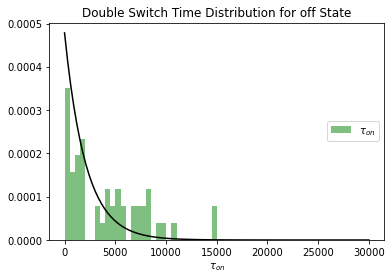

In [10]:
k_off = 1/np.mean(df_off.On_Time)
x = np.linspace(0,30000,100)
plt.plot(x,k_off*np.exp(-k_off*x), color='k')
plt.hist(df_off['On_Time'].unique()[::], bins=30, density=True, color='green', alpha=0.5, label=r'$\tau_{on}$');
plt.legend(loc=5);
plt.xlabel(r'$\tau_{on}$');
plt.title(f'Double Switch Time Distribution for off State');

In [11]:
df_off.columns

Index(['Cell', 'On_Time', 'Off_Time', 'Promoter_State'], dtype='object')

### Células que una vez encendidas, se apagan

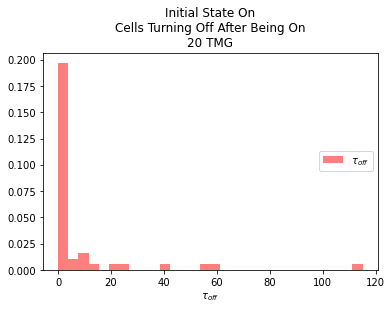

In [12]:
# k_off = 1/np.mean(df_off.Off_Time)
# x = np.linspace(0,30000,100)
# plt.plot(x,k_off*np.exp(-k_off*x), color='k')
plt.hist(df_off['Off_Time'].unique()[1::], bins=30, density=True, color='red', alpha=0.5, label=r'$\tau_{off}$');
plt.legend(loc=5);
plt.xlabel(r'$\tau_{off}$');
plt.title(f'Initial State On\nCells Turning Off After Being On\n20 TMG');
# plt.xscale('log');
# plt.xlim(-1, 2)

In [13]:
# plt.scatter(df_on['On_Time'], df_on['Off_Time'], color='green', alpha=0.5, label=r'$\tau_{on}$');
# df_on['On_Time'].unique().shape
# df_off['Off_Time'].unique().shape

In [14]:
    # r_corr_on = np.corrcoef(df_on_ontime_fixed, df_on_offtime_fixed)[0][1]
    # r_corr_off = np.corrcoef(df_off_ontime_fixed, df_off_offtime_fixed)[0][1]
    # df_on_offtime_fixed = [float(df_on_offtime[i]) for i in range(len(df_on_offtime))]
    # df_on_ontime_fixed = [float(df_on_ontime[i]) - float(df_on_offtime[i]) for i in range(len(df_on_ontime))]

    # df_off_ontime_fixed = [float(df_off_ontime[i]) for i in range(len(df_off_ontime))]
    # df_off_offtime_fixed = [float(df_off_offtime[i]) - float(df_off_ontime[i]) for i in range(len(df_off_offtime))]